In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,NaN,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	0
float64		column 3	3
float64		column 4	0
float64		column 5	1
float64		column 6	2
float64		column 7	1
float64		column 8	2
float64		column 9	2
float64		column 10	0
float64		column 11	1
float64		column 12	1
float64		column 13	1


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,177.000000,178.000000,175.000000,178.000000,177.000000,176.000000,177.000000,176.000000,176.000000,178.000000,177.000000,177.000000,177.000000
mean,12.997345,2.336348,2.371829,19.494944,99.819209,2.301080,2.023446,0.359716,1.586591,5.058090,0.959469,2.607288,748.203390
std,0.812951,1.117146,0.273315,3.339564,14.285286,0.626872,0.998658,0.123221,0.574055,2.318286,0.227622,0.709570,315.313973
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.602500,2.225000,17.200000,88.000000,1.742500,1.200000,0.267500,1.247500,3.220000,0.790000,1.930000,500.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.380000,2.130000,0.340000,1.545000,4.690000,0.970000,2.780000,675.000000
75%,13.680000,3.082500,2.560000,21.500000,107.000000,2.800000,2.860000,0.430000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

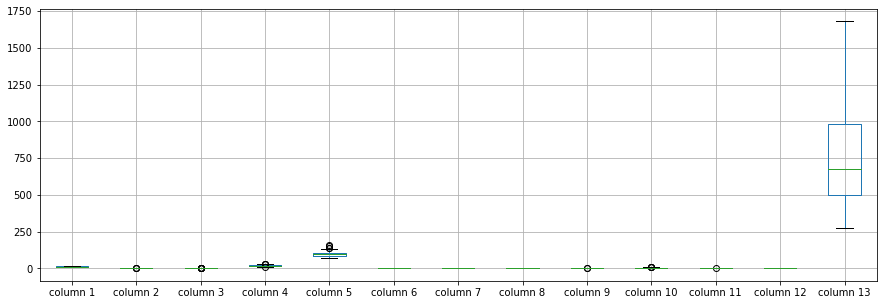

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.997345
column 2       2.336348
column 3       2.371829
column 4      19.494944
column 5      99.819209
column 6       2.301080
column 7       2.023446
column 8       0.359716
column 9       1.586591
column 10      5.058090
column 11      0.959469
column 12      2.607288
column 13    748.203390
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.093661,0.191752,-0.318812,0.264151,0.303629,0.236346,-0.151740,0.138521,0.544595,-0.066849,0.090488,0.643801
column 2,0.093661,1.000000,0.154099,0.288500,-0.057793,-0.324814,-0.409324,0.261110,-0.215518,0.248985,-0.557290,-0.370335,-0.184687
column 3,0.191752,0.154099,1.000000,0.444037,0.267417,0.126296,0.111849,0.179474,0.003005,0.249414,-0.078174,0.007270,0.217373
column 4,-0.318812,0.288500,0.444037,1.000000,-0.083545,-0.319106,-0.346922,0.347086,-0.193940,0.018732,-0.272003,-0.278682,-0.437762
column 5,0.264151,-0.057793,0.267417,-0.083545,1.000000,0.212321,0.185564,-0.253114,0.235432,0.194315,0.056888,0.066773,0.389404
column 6,0.303629,-0.324814,0.126296,-0.319106,0.212321,1.000000,0.863428,-0.437339,0.615291,-0.041915,0.419633,0.695535,0.495218
column 7,0.236346,-0.409324,0.111849,-0.346922,0.185564,0.863428,1.000000,-0.525926,0.651270,-0.174411,0.537139,0.785595,0.488816
column 8,-0.151740,0.261110,0.179474,0.347086,-0.253114,-0.437339,-0.525926,1.000000,-0.357460,0.136360,-0.249516,-0.493419,-0.305750
column 9,0.138521,-0.215518,0.003005,-0.193940,0.235432,0.615291,0.651270,-0.357460,1.000000,-0.028811,0.287950,0.521640,0.330428
column 10,0.544595,0.248985,0.249414,0.018732,0.194315,-0.041915,-0.174411,0.136360,-0.028811,1.000000,-0.529874,-0.426149,0.316484


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+55,13+55+55,13+55+55,13+55+55+55+55,13+55+55+55+55+55,13+55+55+55+55+55+55,13+55+55+55+55+55,13+55+55+55+55,13+55+55+55,13+55+55,13+55,13], vae_layer = False, seed = 550)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 958.9329778497869
Epoch: 1 , loss: 952.8222545276989
Epoch: 2 , loss: 954.3830677379261
Epoch: 3 , loss: 956.2656416459517
Epoch: 4 , loss: 960.6706099076705
Epoch: 5 , loss: 959.1242842240767
Epoch: 6 , loss: 961.5221280184659
Epoch: 7 , loss: 952.0434459339489
Epoch: 8 , loss: 960.8309714577415
Epoch: 9 , loss: 952.1143299449574
Epoch: 10 , loss: 959.0413041548295
Epoch: 11 , loss: 957.9546841708096
Epoch: 12 , loss: 961.6713645241477
Epoch: 13 , loss: 956.2813443270596
Epoch: 14 , loss: 956.7398959073154
Epoch: 15 , loss: 959.709023215554
Epoch: 16 , loss: 958.4410178444602
Epoch: 17 , loss: 955.3086048473011
Epoch: 18 , loss: 956.0496437766335
Epoch: 19 , loss: 958.8163174715909
Epoch: 20 , loss: 958.4048350941051
Epoch: 21 , loss: 959.9485917524858
Epoch: 22 , loss: 955.1779285777699
Epoch: 23 , loss: 957.5893610174006
Epoch: 24 , loss: 960.658241965554
Epoch: 25 , loss: 959.9214311079545
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0.0,0.0,-2.637207,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
174,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
175,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
176,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(521.1188203799591, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.04781749762430298

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,0.422793,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.760000,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.240000,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.490000,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.690000,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.610000,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.750000,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.690000,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.680000,0.53,1.46,9.30,0.60,1.62,840.0


In [20]:
imputations[-1].to_excel("Wine_NW_1(imp).xlsx", index=False, header=False)